#### 系统包

In [91]:
import os
import re
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import jieba
# from wordcloud import WordCloud, STOPWORDS
from gensim.models.word2vec import Word2Vec
from tqdm import tqdm_notebook as tqdm
import IPython.core.display as di 
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_seq_items', 300)
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 20)

# $$一、数据查看与初步处理$$


In [191]:
sent_dict = {i:{} for i in range(10)}
for i, w in enumerate(train_df_final['sentiment_word'].values):
    if str(w) == 'nan':
        continue
    for j in range(10):
        if train_df_final.iloc[i, j+5] > 0:
            sent_dict[j][w] = sent_dict[j].get(w, 0) + 1

# train_df_final.iloc[:, 5]
sent_dict

{0: {'影响': 1,
  '高': 10,
  '低': 4,
  '有钱任性': 1,
  '便宜': 14,
  '死硬': 1,
  '一般': 2,
  '贵': 12,
  '优惠': 29,
  '不会后悔': 1,
  '优惠太小': 1,
  '才优惠': 1,
  '才': 1,
  '呵呵': 2,
  '只优惠': 2,
  '值': 3,
  '套路': 1,
  '好': 2,
  '都不错': 1,
  '喜欢': 1,
  '烧机油': 1,
  '好看': 3,
  '坐进去最放松的': 1,
  '不值': 1,
  '性价比高': 3,
  '不错': 1,
  '优惠小': 1,
  '可以': 1,
  '愉快': 1,
  '高昂': 1,
  '合理': 1,
  '下不来': 1,
  '不会便宜': 2,
  '不高': 3,
  '不完善': 1,
  '放弃': 1,
  '差不多': 7,
  '价格不够': 1,
  '不平易近人': 1,
  '价格老贵了': 1,
  '犹如宝马一般': 1,
  '不能比的': 1,
  '没有保证': 1,
  '高了好多': 1,
  '价格贵': 2,
  '差距不大': 1,
  '给个更便宜的价格': 1,
  '贵了': 1,
  '价格差不多': 1,
  '价格高': 2,
  '价格一般': 1,
  '价格不知道': 1,
  '价格不错': 2,
  '价格不合适': 1,
  '比较低的': 1,
  '合理就行': 1,
  '不纠结': 1,
  '行情价': 1,
  '正常价格': 1,
  '也就多几百': 1,
  '参差不齐': 1,
  '贵太多': 1,
  '不便宜': 4,
  '价格还行': 1,
  '还行': 1,
  '小贵': 2,
  '没啥优惠': 2,
  '合适就买': 1,
  '挺高': 1,
  '价差很大': 1,
  '不菲': 2,
  '低也不能要': 1,
  '不要在意价格': 1,
  '硬伤': 1,
  '下降': 1,
  '贵一点': 2,
  '便宜些': 2,
  '不贵': 5,
  ' ': 1,
  '厚道': 1,
  '增加': 1,
  '奇高': 1,
  

In [194]:
model_file = '../../data/word2vec_models/sgns.baidubaike.bigram-char'
print('create embedding matrix')

def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(model_file).readlines()[1:])

create embedding matrix


In [210]:
sent_embedding = np.zeros((10, 300), dtype='float32')
for i in range(10):
    e = 0.0
    ith_dict = sent_dict[i]
    for key, value in ith_dict.items():
        print(key, value)
        for char in jieba.cut(key.strip(), cut_all=False):
            if char in embeddings_index:
                e += embeddings_index[char] * value / sum(ith_dict.values())
            else:
                print(char, ' not found')
    sent_embedding[i] = e

影响 1
高 10
低 4
有钱任性 1
便宜 14
死硬 1
一般 2
贵 12
优惠 29
不会后悔 1
优惠太小 1
才优惠 1
才 1
呵呵 2
只优惠 2
值 3
套路 1
好 2
都不错 1
喜欢 1
烧机油 1
好看 3
坐进去最放松的 1
不值 1
性价比高 3
不错 1
优惠小 1
可以 1
愉快 1
高昂 1
合理 1
下不来 1
不会便宜 2
不高 3
不高  not found
不完善 1
放弃 1
差不多 7
价格不够 1
不平易近人 1
价格老贵了 1
犹如宝马一般 1
不能比的 1
没有保证 1
高了好多 1
价格贵 2
差距不大 1
给个更便宜的价格 1
贵了 1
价格差不多 1
价格高 2
价格一般 1
价格不知道 1
价格不错 2
价格不合适 1
比较低的 1
合理就行 1
就行  not found
不纠结 1
行情价 1
正常价格 1
也就多几百 1
几百  not found
参差不齐 1
贵太多 1
贵太多  not found
不便宜 4
价格还行 1
还行 1
小贵 2
没啥优惠 2
合适就买 1
挺高 1
挺高  not found
价差很大 1
不菲 2
低也不能要 1
不要在意价格 1
硬伤 1
下降 1
贵一点 2
便宜些 2
不贵 5
  1
厚道 1
增加 1
奇高 1
奇高  not found
噪音大 1
不好 1
比较合理 1
最适合 1
价格太贵 1
价格较高 1
便宜很多 1
这个价格也超级优惠 1
外观奇丑无比 1
外观太丑 1
最好 1
操控满意 1
很不错 1
哪个贵 1
好点 1
好点  not found
没有优势 1
可以的 1
也贵 1
闻名 1
虚高 1
高了 1
相当不错 1
理想 1
油耗低 1
性价比不算很高 1
轴距和空间严重不符 1
再贵的车也没有欧蓝德好 1
再贵  not found
价格好 1
好用 1
好用  not found
四驱无敌 1
真心便宜，秒杀对手    1
机舱里走管子不好走 1
降价还是不要想了 1
优惠力度还是可以的  1
方向盘比较轻 1
较大后备箱 1
风噪是大了点 1
风噪  not found
比森林人强不少 1
人强  not found
隔音效果一般 1
很良心 1
找不出第二辆 1
第二辆  not found
不用考虑了 1
不

颜值  not found
偏大 1
完败 2
烧机油 2
差 2
可以 1
没问题 1
升高 1
噪音大 1
噪音小 1
增加 5
油耗大 2
正常 4
油耗上升 1
无毛病 1
没有任何油耗现象 1
平顺自然 1
也不高 1
好一些 1
没必要做 1
给力 2
给力  not found
额外惊喜 1
哈哈 1
油耗增加 2
油耗会上升 1
没有任何问题 1
没啥区别 1
油耗好 1
油耗高 1
内饰也可以 1
顶不住 1
不错的 1
油耗下降 1
不会高 2
很低 1
油耗低一些 1
油耗太高 1
油耗造假 1
增加油耗 1
油耗高一个 1
没怎么关心 1
油耗有上升 1
稳定 1
油耗哗哗的 1
无变化 1
比以前多 1
还可以 2
省油的 1
油耗很高 2
不可能低 1
高了点 1
高点 1
颇高 1
高很多 1
特大 1
废油 1
惊喜 1
大不少 1
贼高 1
效果不错 1
不好 1
恼人 1
相当棒 1
非常满意 1
油耗蹭蹭的往上涨 1
性价比低 1
油耗不好控制 1
耐用 1
油耗没那么高 1
太高 1
值得拥有 1
确实省 1
胜出 1
稍微高点 1
高一点 1
大些 1
够可以 1
油耗低 5
这油耗牛啊 1
方向盘比较轻 1
操纵好，底盘高 1
2.0森市区油耗真心不错， 1
油耗真心棒 1
最低油耗5.9驾驶体验超级棒 1
低调 1
非常好 1
很高 1
省油不少  1
油耗确实很高 1
油耗水平已经很满意 1
油耗也不高 1
后排太硬。 1
太硬  not found
一般般 1
一般般  not found
爱咋滴就咋滴 1
不敢恭维 1
不着调 1
不见得省 1
不一定费油 1
费油  not found
才 1
省 1
城市 1
省油环保 1
不高、经济 1
不高  not found
不低 1
不低  not found
推荐 1
结实 1
谁买谁后悔 1
油耗奇高 1
奇高  not found
油耗升了 1
油耗不低 1
不低  not found
油耗会下来 1
真高 1
特费油 1
特费油  not found
不靠谱 1
较低 1
很满意 1
不费油 1
不费油  not found
稍微低 1
心真累 1
有点儿高 1
耍流氓 1
神奇无比 1
不必在乎 1
好些 1
满足 1
小 12
都不错 1
大 20
硬伤 

In [211]:
pickle.dump(sent_embedding, open('../../data/sentiment_embedding.pkl', 'wb'))

## 1.0 查看数据

In [118]:
jp_df = pd.read_csv('../../data/csvs/round2zh2jp.csv')
en_df = pd.read_csv('../../data/csvs/round2zh2en.csv')

def cut(cut_df):
    chars = []
    words = []
    for s in tqdm(cut_df['text']):
        s = str(s)
        chars.append(' '.join(list(s)).strip())
        words.append(' '.join(jieba.cut(s, cut_all=False)).strip())
    os.makedirs('../../data/csvs', exist_ok=True)
    cut_df['word'] = words
    cut_df['char'] = chars
    return cut_df
jp_df = cut(jp_df)
en_df = cut(en_df)

In [103]:
train_df = pd.read_csv('../../data/raw_data/train_2.csv')
test_df = pd.read_csv('../../data/raw_data/test_public_2v3.csv')

# len(test_df[test_df.apply(lambda x:x['subject'] in x['content'], axis=1)])
train_df['sentiment_value'].value_counts()

 0    8488
 1    2048
-1    2036
Name: sentiment_value, dtype: int64

In [85]:
from tqdm import tqdm
tmp_df = pd.read_csv('../../data/csvs/train_multi.csv')
tmp_df[:100]
words = list(tmp_df['word'])
freq_dict = {}
for w in words:
    for token in w.split():
        freq_dict[token] = freq_dict.get(token, 0) + 1
freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)


saved_token = []
word2vec = {}
with open('../../data/word2vec_models/sgns.baidubaike.bigram-char', 'r') as fin:
    for l in tqdm(fin.readlines()[1:]):
        token = l.strip().split()[0]
        array = ' '.join(l.strip().split()[1:])
        word2vec[token] = array
for token, _ in freq_dict:
    if token in word2vec:
        saved_token[len(saved_token)] = (token, word2vec[token])

os.makedirs('../../data/qiuqiu/', exist_ok=True)
with open('../../data/qiuqiu/vocab.txt', 'w') as fout, open('../../data/qiuqiu/embedding.txt', 'w') as f_emb:
    fout.write('<S>\n</S>\n<UNK>\n')
    f_emb.write('{} {}\n'.format(len(saved_token), 300))
    for k in saved_token:
        fout.write(k[0]+'\n')
        f_emd.write(k[0]+' ' + k[1] + '\n')


100%|██████████| 635974/635974 [00:35<00:00, 18113.65it/s]


IndexError: list assignment index out of range

In [181]:
import pickle
# train_df = train_df.sample(frac=1)
# train_df = train_df.reset_index(drop=True)
# with open('./words.txt', 'w') as f:
#     for c in train_df_final['content'].values:
#         f.write(''.join(c.strip().split()) + '\n')
with open('./word_tests.txt', 'w') as f:
    for c in test_df['content'].values:
        f.write(''.join(c.strip().split()) + '\n')
# with open('../data', 'w') as f:
# with open('../../data/sentiment_words_list.pkl', 'w') as f:
#     pickle.dump(train_df['sentiment_word'].values, f)

In [172]:

sent_word_list = list(train_df_final['sentiment_word'].values)
with open('../../data/sentiment_word.txt', 'w') as fw, open('../../data/sentiment_char.txt', 'w') as fc:
    for idx, line in enumerate(sent_word_list):
        if str(line) != 'nan':
            line = line.strip()
            fc.write(' '.join(list(line)) + '\n')
            fw.write(' '.join(jieba.cut(line, cut_all=False)) + '\n')
        else:
            fc.write('\n')
            fw.write('\n')

In [154]:
sent_dict = {}

train_df_final

,content_id,content,word,char,sentiment_word,subject_价格,subject_内饰,subject_动力,subject_外观,subject_安全性,subject_油耗,subject_空间,subject_舒适性,subject_操控,subject_配置
0,13149,因为森林人即将换代，这套系统没必...,因为 森林 人 即将 换代 ， ...,因 为 森 林 人 即 将 换 ...,影响,2,0,0,0,0,0,0,0,0,0
1,2288,四驱价格貌似挺高的，高的可以看齐...,四驱 价格 貌似 挺 高 的 ，...,四 驱 价 格 貌 似 挺 高 ...,高,1,0,0,0,0,0,0,0,0,0
2,1652,斯柯达要说质量，似乎比大众要好一...,斯柯达 要说 质量 ， 似乎 比...,斯 柯 达 要 说 质 量 ， ...,低,3,0,0,0,0,0,0,0,0,0
3,8865,这玩意都是给有钱任性又不懂车的土...,这 玩意 都 是 给 有钱 任性...,这 玩 意 都 是 给 有 钱 ...,有钱任性,1,0,0,0,0,0,0,0,0,0
4,11784,17价格忒高，估计也就是14-1...,17 价格 忒 高 ， 估计 也...,1 7 价 格 忒 高 ， 估 ...,高,1,0,0,0,0,0,0,0,0,0
5,14601,我开始就是荣放2.5 森林人2...,我 开始 就是 荣放 2.5 ...,我 开 始 就 是 荣 放 2 ...,便宜,3,0,0,0,0,0,0,0,0,0
6,15972,唉，这货的价格死硬死硬的，低配版...,唉 ， 这货 的 价格 死硬 死...,唉 ， 这 货 的 价 格 死 ...,死硬,1,0,0,0,0,0,0,0,0,0
7,17103,价格的话只能说一般般吧，太仓前段...,价格 的话 只能 说 一般般 吧...,价 格 的 话 只 能 说 一 ...,一般,2,0,0,0,0,0,0,0,0,0
8,1986,听过，价格太贵，但一直念念不忘,听过 ， 价格 太贵 ， 但 一...,听 过 ， 价 格 太 贵 ， ...,贵,1,0,0,0,0,0,0,0,0,0
9,3234,恭喜恭喜，这个优惠不错哦！,恭喜 恭喜 ， 这个 优惠 不错...,恭 喜 恭 喜 ， 这 个 优 ...,优惠,2,0,0,0,0,0,0,0,0,0


In [177]:
sent_set = set(train_df['sentiment_word'].values)

test_sent_list = []
for c in test_df['content'].values:
    flag = 0
    for s in sent_set:
        if str(s) == 'nan':
            continue
        if s in c:
            test_sent_list.append(s)
            flag = 1
            break
    if flag == 0:
        test_sent_list.append('')
test_df['sentiment_word'] = test_sent_list


In [178]:
test_df

,content_id,content,sentiment_word
0,01htTx8jcsqp3CYr,XV新款低配比以前低配配置方面高...,
1,03wYj5KyOnLcmbHe,助力跟着发动机走？很奇葩啊！最起...,奇葩
2,05JqRAdHXSsbxWvr,只有报警，如果你想检验一下可以把...,有
3,0653EkFWJzSYsP7w,不太好判断你描绘的声音，后座安全...,好
4,06H4OMfwaG1xoqFb,前雷达撞了感觉作用不大,大
5,06iTfdx8yo1OmEZq,这消耗对得住12FB25，我群里...,有
6,0aKUsYjmWXVMlc1w,召回跟变速箱硬件没关系不是质量问...,问题
7,0aNFWEteHpDCxqj2,增强车辆尾部操控，我是防倾杆和小...,强
8,0aPkxUi8QZB49jAq,2.0的，国庆跑了一个来回高速，...,市区
9,0AsYm8O6JBuqCh73,跑达喀尔的长城和民用长城有关系吗...,有


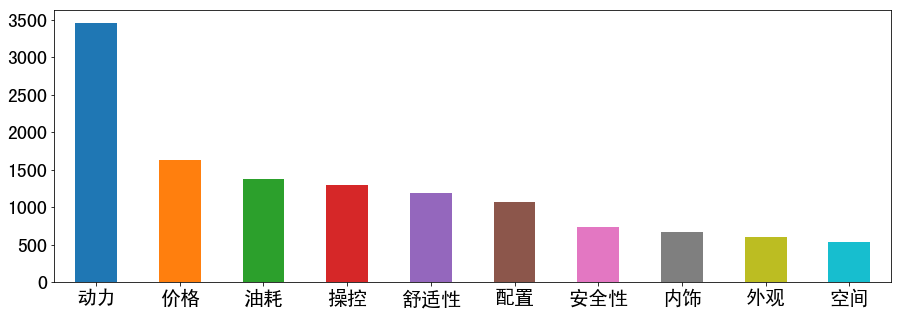

In [38]:
train_2_df['subject'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=20, rot=0)

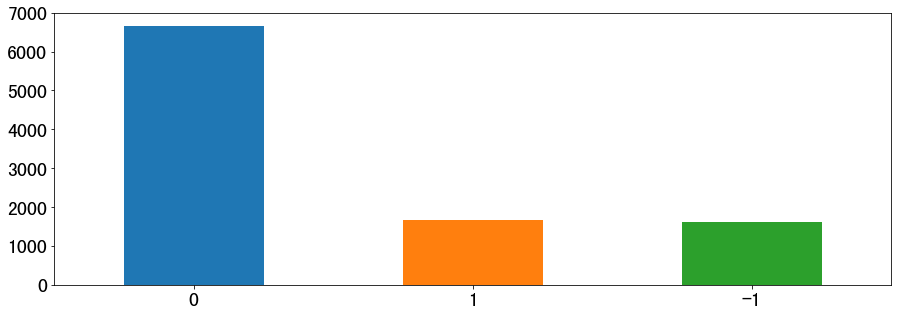

In [288]:
train_df['sentiment_value'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=20, rot=0)

In [289]:
train_df['sentiment_word'].value_counts()

烧机油         69
好           40
高           37
不错          37
异响          29
大           28
差           26
低           22
省油          20
便宜          18
强           18
优惠          18
噪音大         16
噪音          16
响           14
够用          13
小           12
贵           12
好看          12
还可以         12
满意          12
舒服          12
喜欢          12
空间大         11
没问题         11
差不多         10
正常           9
不行           9
费油           8
可以           8
一般           7
下降           6
最好           6
胜出           6
不高           6
完败           6
好点           6
很好           6
更好           6
硬伤           6
给力           6
手机导航         5
没有           5
非常好          5
爆震           5
不烧机油         5
鸡肋           5
还行           5
太差           5
软            5
            ..
油耗上升         1
噪音较大         1
啥都好          1
不算问题         1
控制不了         1
不费劲          1
比森林人强不少      1
油耗没那么高       1
内饰太L0W       1
不舒服、异响       1
还是现款好看       1
安全感极高        1
不逊于          1
不怎么好看        1
差点追尾         1
发动机噪音确实大  

## 1.1 切词保存csv

In [7]:
# 只在第一次进入cell时运行

def cut(cut_df):
    chars = []
    words = []
    for s in tqdm(cut_df['content']):
        chars.append(' '.join(list(s)).strip())
        words.append(' '.join(jieba.cut(s, cut_all=False)).strip())
    os.makedirs('../../data/csvs', exist_ok=True)
    cut_df['word'] = words
    cut_df['char'] = chars
    return cut_df

test_cut_df = cut(test_df)
train_cut_df = cut(train_df)

test_cut_df.to_csv('../../data/csvs/test_public.csv', index=None)
train_cut_df.to_csv('../../data/csvs/train.csv', index=None)

test_cut_df = pd.read_csv('../../data/csvs/test_public.csv')
train_cut_df = pd.read_csv('../../data/csvs/train.csv')


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.021 seconds.
Prefix dict has been built succesfully.


In [109]:
# elmo 训练语料
os.makedirs('../../data/elmo_corpus/', exist_ok=True)
with open('../../data/elmo_corpus/word.txt', 'w') as f1, open('../../data/elmo_corpus/char.txt', 'w') as f2:
    for i in pd.concat((train_cut_df['word'], test_cut_df['word'])):
        f1.write(i+'\n')
    for i in pd.concat((train_cut_df['char'], test_cut_df['char'])):
        f2.write(i+'\n')

In [1]:
import tensorflow as tf
#case 2
input = tf.Variable(tf.random_normal([1,7,5,1]))
filter = tf.Variable(tf.random_normal([2,5,1,64]))
 
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID') # 1,3,3,1


init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    print("case 2")
    print(sess.run(op2).shape)


/data3/jzzhou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use `tf.global_variables_initializer` instead.
case 2
(1, 6, 1, 64)


## 1.2 处理Label-十种四分类

In [100]:
sub_list = ['subject_价格', 'subject_内饰', 'subject_动力', 'subject_外观', 'subject_安全性',
            'subject_油耗', 'subject_空间', 'subject_舒适性', 'subject_操控', 'subject_配置']
pickle.dump(sub_list, open('../../data/sub_list.pkl', 'wb'))
columns = ['content_id', 'content', 'word', 'char', 'sentiment_word']
columns.extend(sub_list)
train_df_final = pd.DataFrame(columns=columns)

for i in tqdm(range(len(train_cut_df))):
    c_id = train_cut_df.iloc[i]['content_id']
    subject_str = 'subject_' + train_cut_df.iloc[i]['subject']
    sent_val = train_cut_df.iloc[i]['sentiment_value']
    
    if c_id in set(train_df_final['content_id'].values):
        train_df_final[subject_str][train_df_final['content_id'] == c_id] = sent_val + 2

    else:
        sub_dict = {k:0 for k in sub_list}
        sub_dict[subject_str] = sent_val + 2
        content_dict = {
            'content_id': c_id,
            'content': train_cut_df.iloc[i]['content'],
            'word' : train_cut_df.iloc[i]['word'],
            'char' : train_cut_df.iloc[i]['char'],
            'sentiment_word' : train_cut_df.iloc[i]['sentiment_word'],
        }
        content_dict.update(sub_dict)
        train_df_final.loc[train_df_final.shape[0]] = content_dict

In [128]:
train_df.shape
jp_df['content_id'] = train_df['content_id']
en_df['content_id'] = train_df['content_id']

In [135]:
# tmp_df = en_df.loc[list(train_df_final['content_id'].values)]
# tmp_df
en_df.drop_duplicates(subset='content_id', inplace=True)
jp_df.drop_duplicates(subset='content_id', inplace=True)
jp_df.to_csv('../../data/csvs/round2zh2jp.csv')
en_df.to_csv('../../data/csvs/round2zh2en.csv')


In [136]:
en_df.shape

(10654, 5)

In [137]:
train_df_final.shape

(10654, 15)

In [23]:
print(len(train_df[train_df.duplicated(['content_id', 'content'])]))
print(len(train_df))
print(len(train_df_final))


multi_item_df = train_df_final[train_df_final[train_df_final[sub_list] > 0].count(axis=1) > 1]
len(multi_item_df)

1918
12572
10654


1472

In [74]:
# 统计类别比
labels = train_df_final.iloc[:, 5:].values
labels_dict = {}

for idx,l in enumerate(labels):
    n_l = np.sum(l>0)
    labels_dict[n_l] = labels_dict.get(n_l, 0) + 1


n_c0 = np.sum(labels == 0)
n_c1 = np.sum(labels == 1)
n_c2 = np.sum(labels == 2)
n_c3 = np.sum(labels == 3)
n_total = n_c0 + n_c1 + n_c2 + n_c3
w_c0 = n_c0 / n_total
w_c1 = n_c1 / n_total
w_c2 = n_c2 / n_total
w_c3 = n_c3 / n_total
w_c0, w_c1, w_c2, w_c3

(0.8819973718791064,
 0.019110193354608597,
 0.07966960765909517,
 0.019222827107189786)

In [29]:
train_df_final.to_csv('../../data/csvs/train_multi.csv')

0    7208
2     793
3     151
1     138
Name: subject_油耗, dtype: int64

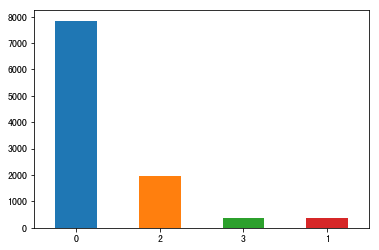

## 1.3 处理Label-组合单分类

In [370]:
def generate_label():
    df = train_cut_df.copy()
    label_stoi = {}
    def combine_label(a, b):
        return '{}-{}'.format(a, b+1)
    df['class'] = df.apply(lambda row: combine_label(row['subject'], row['sentiment_value']), axis=1)
    for c in df['class'].value_counts().index:
        label_stoi[c] = len(label_stoi)
    df['c_numerical'] = df.apply(lambda row: label_stoi[row['class']], axis=1)
    return label_stoi, df
label_stoi, df = generate_label()
pickle.dump(label_stoi, open('../../data/single_label_stoi.pkl', 'wb'))
df.to_csv('../../data/csvs/train_single.csv')
df[:5]


,content_id,content,subject,sentiment_value,sentiment_word,word,char,class,c_numerical
0,vUXizsqexyZVRdFH,因为森林人即将换代，这套系统没必要装在一款即将换代的车型上，因为肯定会影响价格。,价格,0,影响,因为 森林 人 即将 换代 ， 这套 系统 没 必要 装在 一款 即将 换代 的 车型 上 ...,因 为 森 林 人 即 将 换 代 ， 这 套 系 统 没 必 要 装 在 一 款 即 将 ...,价格-1,1
1,4QroPd9hNfnCHVt7,四驱价格貌似挺高的，高的可以看齐XC60了，看实车前脸有点违和感。不过大众的车应该不会差。,价格,-1,高,四驱 价格 貌似 挺 高 的 ， 高 的 可以 看齐 XC60 了 ， 看实车 前 脸 有点...,四 驱 价 格 貌 似 挺 高 的 ， 高 的 可 以 看 齐 X C 6 0 了 ， 看 ...,价格-0,18
2,QmqJ2AvM5GplaRyz,斯柯达要说质量，似乎比大众要好一点，价格也低一些，用料完全一样。我听说过野帝，但没听说过你说...,价格,1,低,斯柯达 要说 质量 ， 似乎 比 大众 要 好 一点 ， 价格 也 低 一些 ， 用料 完全...,斯 柯 达 要 说 质 量 ， 似 乎 比 大 众 要 好 一 点 ， 价 格 也 低 一 ...,价格-2,24
3,KMT1gFJiU4NWrVDn,这玩意都是给有钱任性又不懂车的土豪用的，这价格换一次我妹夫EP020可以换三锅了,价格,-1,有钱任性,这 玩意 都 是 给 有钱 任性 又 不 懂车 的 土豪 用 的 ， 这 价格 换 一次 我...,这 玩 意 都 是 给 有 钱 任 性 又 不 懂 车 的 土 豪 用 的 ， 这 价 格 ...,价格-0,18
4,nVIlGd5yMmc37t1o,17价格忒高，估计也就是14-15左右。,价格,-1,高,17 价格 忒 高 ， 估计 也 就是 14 - 15 左右 。,1 7 价 格 忒 高 ， 估 计 也 就 是 1 4 - 1 5 左 右 。,价格-0,18


## 1.4 处理Label-先分主题，再分情感

In [9]:
def generate_label():
    df = train_cut_df.copy()
    label_stoi = {}
    for c in df['subject'].value_counts().index:
        label_stoi[c] = len(label_stoi)
    df['sub_numerical'] = df.apply(lambda row: label_stoi[row['subject']], axis=1)
    df['sentiment_value'] = df.apply(lambda row: row['sentiment_value']+1, axis=1)
    return label_stoi, df
label_stoi, df = generate_label()

os.makedirs('../../data/csvs', exist_ok=True)
pickle.dump(label_stoi, open('../../data/subject_label_stoi.pkl', 'wb'))
df.to_csv('../../data/csvs/train_single_label.csv')
df[:5]

,content_id,content,subject,sentiment_value,sentiment_word,word,char,sub_numerical
0,13149,因为森林人即将换代，这套系统没必要装在一款即将换代的车型上，因为肯定会影响价格。,价格,1,影响,因为 森林 人 即将 换代 ， 这套 系统 没 必要 装在 一款 即将 换代 的 车型 上 ...,因 为 森 林 人 即 将 换 代 ， 这 套 系 统 没 必 要 装 在 一 款 即 将 ...,1
1,2288,四驱价格貌似挺高的，高的可以看齐XC60了，看实车前脸有点违和感。不过大众的车应该不会差。,价格,0,高,四驱 价格 貌似 挺 高 的 ， 高 的 可以 看齐 XC60 了 ， 看实车 前 脸 有点...,四 驱 价 格 貌 似 挺 高 的 ， 高 的 可 以 看 齐 X C 6 0 了 ， 看 ...,1
2,1652,斯柯达要说质量，似乎比大众要好一点，价格也低一些，用料完全一样。我听说过野帝，但没听说过你说...,价格,2,低,斯柯达 要说 质量 ， 似乎 比 大众 要 好 一点 ， 价格 也 低 一些 ， 用料 完全...,斯 柯 达 要 说 质 量 ， 似 乎 比 大 众 要 好 一 点 ， 价 格 也 低 一 ...,1
3,8865,这玩意都是给有钱任性又不懂车的土豪用的，这价格换一次我妹夫EP020可以换三锅了,价格,0,有钱任性,这 玩意 都 是 给 有钱 任性 又 不 懂车 的 土豪 用 的 ， 这 价格 换 一次 我...,这 玩 意 都 是 给 有 钱 任 性 又 不 懂 车 的 土 豪 用 的 ， 这 价 格 ...,1
4,11784,17价格忒高，估计也就是14-15左右。,价格,0,高,17 价格 忒 高 ， 估计 也 就是 14 - 15 左右 。,1 7 价 格 忒 高 ， 估 计 也 就 是 1 4 - 1 5 左 右 。,1


In [21]:
df.columns[2:]
for l in df[2:]:

Index(['subject', 'sentiment_value', 'sentiment_word', 'word', 'char',
       'sub_numerical'],
      dtype='object')

## 1.5 多标签分类，主题情感一起分

,content_id,word,char,class
0,vUXizsqexyZVRdFH,因为 森林 人 即将 换代 ， 这套 系统 没 必要 装在 一款 即将 换代 的 车型 上 ...,因 为 森 林 人 即 将 换 代 ， 这 套 系 统 没 必 要 装 在 一 款 即 将 ...,价格_0
1,4QroPd9hNfnCHVt7,四驱 价格 貌似 挺 高 的 ， 高 的 可以 看齐 XC60 了 ， 看实车 前 脸 有点...,四 驱 价 格 貌 似 挺 高 的 ， 高 的 可 以 看 齐 X C 6 0 了 ， 看 ...,价格_-1
2,QmqJ2AvM5GplaRyz,斯柯达 要说 质量 ， 似乎 比 大众 要 好 一点 ， 价格 也 低 一些 ， 用料 完全...,斯 柯 达 要 说 质 量 ， 似 乎 比 大 众 要 好 一 点 ， 价 格 也 低 一 ...,价格_1


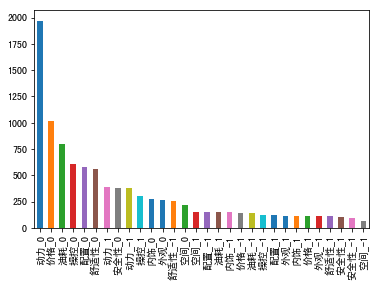

In [37]:
train_multi_df = train_cut_df[['content_id', 'word', 'char']]
train_multi_df['class'] = train_cut_df.apply(lambda row: '{}_{}'.format(row['subject'],row['sentiment_value']), axis=1)
train_multi_df['class'].value_counts().plot(kind='bar')
train_multi_df[:3]

In [38]:
if '价格_0' not in train_multi_df.columns:
    train_multi_df = pd.concat((train_multi_df, pd.get_dummies(train_multi_df['class'])), axis=1)

train_multi_df = train_multi_df.groupby(['content_id', 'word', 'char']).sum().reset_index(drop=False)
train_multi_df[:3]

,content_id,word,char,价格_-1,价格_0,价格_1,内饰_-1,内饰_0,内饰_1,动力_-1,...,油耗_1,空间_-1,空间_0,空间_1,舒适性_-1,舒适性_0,舒适性_1,配置_-1,配置_0,配置_1
0,01DqbWMwRjfBxLYz,自动 启停 对车 没 好处 ， 等 红灯 挂 N 挡 ， 轻 刹车 。,自 动 启 停 对 车 没 好 处 ， 等 红 灯 挂 N 挡 ， 轻 刹 车 。,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01X4vSqHci6NPYBy,开 的 2.0 ？ 在 西藏 动力 如何 ？,开 的 2 . 0 ？ 在 西 藏 动 力 如 何 ？,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02VHu4amZkpAGTb7,常用 配件 价格 不 贵 ， 跟 大众 差不多 。 而且 常用 配件 都 有 备货 ， 如果...,常 用 配 件 价 格 不 贵 ， 跟 大 众 差 不 多 。 而 且 常 用 配 件 都 ...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
train_multi_df.to_csv('../../data/csvs/multi_train.csv')
# train_multi_df.iloc[:, 3:].values
multi_label_itos = list(train_multi_df.iloc[:, 3:].columns)
pickle.dump(multi_label_itos, open('../../data/multi_label_itos.pkl', 'wb'))
multi_label_itos

['价格_-1',
 '价格_0',
 '价格_1',
 '内饰_-1',
 '内饰_0',
 '内饰_1',
 '动力_-1',
 '动力_0',
 '动力_1',
 '外观_-1',
 '外观_0',
 '外观_1',
 '安全性_-1',
 '安全性_0',
 '安全性_1',
 '操控_-1',
 '操控_0',
 '操控_1',
 '油耗_-1',
 '油耗_0',
 '油耗_1',
 '空间_-1',
 '空间_0',
 '空间_1',
 '舒适性_-1',
 '舒适性_0',
 '舒适性_1',
 '配置_-1',
 '配置_0',
 '配置_1']

## 1.6 多标签分类，先分主题再分情感

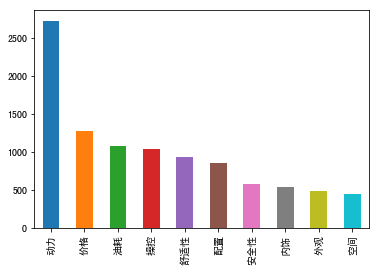

In [80]:
train_multi_sub_df = train_cut_df[['content_id', 'word', 'char', 'subject']]
train_multi_sub_df['subject'].value_counts().plot(kind='bar')

In [84]:
if '价格' not in train_multi_sub_df.columns:
    train_multi_sub_df = pd.concat((train_multi_sub_df, pd.get_dummies(train_multi_sub_df['subject'])), axis=1)

train_multi_sub_df = train_multi_sub_df.groupby(['content_id', 'word', 'char']).sum().reset_index(drop=False)
train_multi_sub_df[:3]

,content_id,word,char,价格,内饰,动力,外观,安全性,操控,油耗,空间,舒适性,配置
0,01DqbWMwRjfBxLYz,自动 启停 对车 没 好处 ， 等 红灯 挂 N 挡 ， 轻 刹车 。,自 动 启 停 对 车 没 好 处 ， 等 红 灯 挂 N 挡 ， 轻 刹 车 。,0,0,0,0,0,1,0,0,0,0
1,01X4vSqHci6NPYBy,开 的 2.0 ？ 在 西藏 动力 如何 ？,开 的 2 . 0 ？ 在 西 藏 动 力 如 何 ？,0,0,1,0,0,0,0,0,0,0
2,02VHu4amZkpAGTb7,常用 配件 价格 不 贵 ， 跟 大众 差不多 。 而且 常用 配件 都 有 备货 ， 如果...,常 用 配 件 价 格 不 贵 ， 跟 大 众 差 不 多 。 而 且 常 用 配 件 都 ...,1,0,0,0,0,0,0,0,0,0


In [85]:
train_multi_sub_df.to_csv('../../data/csvs/multi_sub_train.csv')
multi_sub_label_itos = list(train_multi_sub_df.iloc[:, 3:].columns)
pickle.dump(multi_sub_label_itos, open('../../data/multi_sub_label_itos.pkl', 'wb'))
multi_sub_label_itos

['价格', '内饰', '动力', '外观', '安全性', '操控', '油耗', '空间', '舒适性', '配置']

In [36]:
(train_df['sentiment_value']+1).values

array([1, 0, 2, ..., 0, 0, 1])

# $$二、数据特征处理$$


## 2.1 低频词过滤

In [10]:
# 训练数据少，不处理低频词
def construct_dict(df, d_type='word'):
    word_dict = {}
    corput = df.word if d_type == 'word' else df.char
    for line in tqdm(corput):
        for e in line.strip().split():
            word_dict[e] = word_dict.get(e, 0) + 1
    return word_dict
word_dict = construct_dict(train_df, d_type='word')
char_dict = construct_dict(train_df, d_type='char')
word_stop_word = set([e for e in word_dict if word_dict[e] <=0])
char_stop_word = set([e for e in char_dict if char_dict[e] <=0])
pickle.dump(set(word_stop_word), open('../../data/word_stopword.pkl', 'wb'))
pickle.dump(set(char_stop_word), open('../../data/char_stopword.pkl', 'wb'))

## 2.2 合适长度选择

In [19]:
# 1000长度以内可以随意选，这里选最长的
# word单句合适长度 128
# char单句合适长度 200
def check_len(df, type='word'):
    s_dct = {}
    corpus = df.word if type == 'word' else df.char
    for s in corpus:
        s = [e for e in s.split() if e not in char_stop_word]
        s_dct[len(s)] = s_dct.get(len(s), 0) + 1
    l_lst = sorted(s_dct.items(), key=lambda x:x[0], reverse=False)
    sum(s_dct.values())
    p = 0.
    for l in l_lst:
        p += l[1] / sum(s_dct.values())
        print(str(l[0]) + '\t' + str(l[1]) + '\t' + str(p))
check_len(test_cut_df, 'char')
# check_len(test_cut_df, 'char')
# check_len(train_df_final, 'char')
# check_len(test_cut_df, 'char')
# len(train_cut_df)

9	1	0.0003632401017072285
10	3	0.001452960406828914
11	59	0.022884126407555393
12	57	0.04358881220486742
13	50	0.06175081729022884
14	62	0.08427170359607701
15	60	0.10606610969851071
16	62	0.12858699600435888
17	63	0.15147112241191427
18	90	0.18416273156556484
19	78	0.21249545949872867
20	70	0.23792226661823465
21	63	0.26080639302579006
22	59	0.28223755902651654
23	49	0.3000363240101707
24	67	0.324373410824555
25	49	0.3421721758082092
26	55	0.36215038140210676
27	38	0.37595350526698146
28	34	0.38830366872502725
29	56	0.40864511442063206
30	54	0.4282600799128224
31	38	0.4420632037776971
32	46	0.4587722484562296
33	41	0.47366509262622597
34	31	0.48492553577915004
35	52	0.5038140210679259
36	35	0.516527424627679
37	42	0.5317835088993825
38	47	0.5488557936796222
39	37	0.5622956774427896
40	39	0.5764620414093715
41	37	0.5899019251725389
42	34	0.6022520886305847
43	49	0.6200508536142388
44	32	0.6316745368688701
45	30	0.642571739920087
46	34	0.6549219033781327
47	41	0.6698147475481291
48	32	0

In [316]:

# 按句子分合适长度
# max_sent = 20
# max_word_len = 40
# max_char_len = 70
def check_lens(df):
    max_word = {}
    max_word_len = {}
    max_char = {}
    max_char_len = {}
    word = df.word
    char = df.char
    for w in word:
        sents = re.split(r" 。 | ， ", w.strip())
        max_word[len(sents)] = max_word.get(len(sents), 0) + 1
        for t in sents:
            max_word_len[len(t.split())] = max_word_len.get(len(t.split()), 0) + 1
    for c in char:
        sents = re.split(r" 。 | ， ", c.strip())
        max_char[len(sents)] = max_char.get(len(sents), 0) + 1
        for t in sents:
            max_char_len[len(t.split())] = max_char_len.get(len(t.split()), 0) + 1
    s_dct = max_char
    s_dct = max_word_len
    s_dct = max_char_len
    l_lst = sorted(s_dct.items(), key=lambda x:x[0], reverse=False)
    p = 0.
    for l in l_lst:
        p += l[1] / sum(s_dct.values())
        print(str(l[0]) + '\t' + str(l[1]) + '\t' + str(p))
#     print(max_word, max_word_len, max_char, max_char_len)
    
# check_lens(train_df_final)

## 2.3 Word2vec模型训练

In [104]:
# 训练词向量
def train_w2v_model(type='char', min_freq=2, size=100):
    sentences = []

    if type == 'char':
        corpus = np.concatenate((train_cut_df['char'], test_cut_df['char']))
    elif type == 'word':
        corpus = np.concatenate((train_cut_df['word'], test_cut_df['word']))
    for e in tqdm(corpus):
        sentences.append([i for i in e.strip().split() if i])
    print('训练集语料:', len(corpus))
    print('总长度: ', len(sentences))
    model = Word2Vec(sentences, size=size, window=5, min_count=min_freq)
    model.itos = {}
    model.stoi = {}
    model.embedding = {}
    item_to_id = {}
    print('保存模型...')
    
    for k in tqdm(sorted(list(model.wv.vocab.keys()), reverse=True)):
        item_to_id[k] = model.wv.vocab[k].index
    os.makedirs('../../data/word2vec_models/', exist_ok=True)
    model.wv.save_word2vec_format('../../data/word2vec_models/word2vec.{}.{}d.model.txt'.format(type, size), binary=False)
    pickle.dump(item_to_id, open('../../data/{}_item_to_id.pkl'.format(type), 'wb'))
    words = model.wv.vocab
    with open('../../data/word2vec_models/word2vec.{}.{}d.vocab.txt'.format(type, size, min_freq),'w') as f:
        f.write('<S>\n</S>\n<UNK>\n')  # bilm-tf 要求vocab有这三个符号，并且在最前面
        for word in words:
            f.write(word+'\n')

    return model
# 比赛数据
model = train_w2v_model(type='char', min_freq=3, size=300)
model = train_w2v_model(type='word', min_freq=3, size=300)
# train_df[:3]
print('OK')

训练集语料: 15325
总长度:  15325
保存模型...


训练集语料: 15325
总长度:  15325
保存模型...


OK


In [101]:
# 加入汽车之家数据
# 训练词向量
def train_w2v_model(type='char', min_freq=2, size=100):
    sentences = []

    print(train_cut_df['char'][:5])
    print(test_cut_df['char'][:5])
    print(char_corpus[:5])
    if type == 'char':
        corpus = np.concatenate((train_cut_df['char'], test_cut_df['char'], char_corpus))
    elif type == 'word':
        corpus = np.concatenate((train_cut_df['word'], test_cut_df['word'], word_corpus))
    print(corpus[:5])
    for e in tqdm(corpus):
        print(e)
        return
        sentences.append([i for i in e.strip().split() if i])
    print('训练集语料:', len(corpus))
    print('总长度: ', len(sentences))
    model = Word2Vec(sentences, size=size, window=5, min_count=min_freq)
    model.itos = {}
    model.stoi = {}
    model.embedding = {}
    item_to_id = {}
    print('保存模型...')

    for k in tqdm(sorted(list(model.wv.vocab.keys()), reverse=True)):
        item_to_id[k] = model.wv.vocab[k].index
    os.makedirs('../../data/word2vec_models/', exist_ok=True)
    model.wv.save_word2vec_format('../../data/word2vec_models/word2vec.{}.{}d.model.cars-home.txt'.format(type, size, min_freq), binary=False)
    pickle.dump(item_to_id, open('../../data/{}_item_to_id.cars-home.pkl'.format(type), 'wb'))
    return model

# with open('../../data/data_cars_home/all_text.txt') as f:
#     corpus = [''.join(line.strip().split(' ')[1:]) for line in f]
#     word_corpus = [' '.join(jieba.cut(s, cut_all=False)) for s in tqdm(corpus)]
#     char_corpus = [' '.join(list(s)) for s in tqdm(corpus)]


model = train_w2v_model(type='char', min_freq=3, size=300)
model = train_w2v_model(type='word', min_freq=3, size=300)
# train_df[:3]
print('OK')

0    因 为 森 林 人 即 将 换 代 ， 这 套 系 统 没 必 要 装 在 一 款 即 将 ...
1    四 驱 价 格 貌 似 挺 高 的 ， 高 的 可 以 看 齐 X C 6 0 了 ， 看 ...
2    斯 柯 达 要 说 质 量 ， 似 乎 比 大 众 要 好 一 点 ， 价 格 也 低 一 ...
3    这 玩 意 都 是 给 有 钱 任 性 又 不 懂 车 的 土 豪 用 的 ， 这 价 格 ...
4              1 7 价 格 忒 高 ， 估 计 也 就 是 1 4 - 1 5 左 右 。
Name: char, dtype: object
0    X V 新 款 低 配 比 以 前 低 配 配 置 方 面 高 了 好 多 ， 森 林 人 ...
1    助 力 跟 着 发 动 机 走 ？ 很 奇 葩 啊 ！ 最 起 码 不 是 隔 着 减 速 ...
2      只 有 报 警 ， 如 果 你 想 检 验 一 下 可 以 把 一 只 轮 胎 放 点 气 。
3    不 太 好 判 断 你 描 绘 的 声 音 ， 后 座 安 全 带 卡 子 也 时 常 发 ...
4                                前 雷 达 撞 了 感 觉 作 用 不 大
Name: char, dtype: object
['当 然 外 观 和 内 饰 了', '提 速 很 不 错 ， 在 路 上 就 是 一 亮 点', '操 控 好 ， 越 来 越 顺 手', '操 控 很 舒 服', '整 车 的 乘 坐 舒 适 度']
['因 为 森 林 人 即 将 换 代 ， 这 套 系 统 没 必 要 装 在 一 款 即 将 换 代 的 车 型 上 ， 因 为 肯 定 会 影 响 价 格 。'
 '四 驱 价 格 貌 似 挺 高 的 ， 高 的 可 以 看 齐 X C 6 0 了 ， 看 实 车 前 脸 有 点 违 和 感 。 不 过 大 众 的 车 应 该 不 会 差 。'
 '斯 柯 达 要 说 质 量 ， 似 乎 比 大 众 要 好 一 点 ， 价 格 也 低 一 些 ， 用 料 完 全 一 样 。 我 听 说 过 野 帝 ， 但 没 听 说 过 你 说 这 车 。'
 '这 玩 意 都 是 给 有 钱

因 为 森 林 人 即 将 换 代 ， 这 套 系 统 没 必 要 装 在 一 款 即 将 换 代 的 车 型 上 ， 因 为 肯 定 会 影 响 价 格 。
0    因 为 森 林 人 即 将 换 代 ， 这 套 系 统 没 必 要 装 在 一 款 即 将 ...
1    四 驱 价 格 貌 似 挺 高 的 ， 高 的 可 以 看 齐 X C 6 0 了 ， 看 ...
2    斯 柯 达 要 说 质 量 ， 似 乎 比 大 众 要 好 一 点 ， 价 格 也 低 一 ...
3    这 玩 意 都 是 给 有 钱 任 性 又 不 懂 车 的 土 豪 用 的 ， 这 价 格 ...
4              1 7 价 格 忒 高 ， 估 计 也 就 是 1 4 - 1 5 左 右 。
Name: char, dtype: object
0    X V 新 款 低 配 比 以 前 低 配 配 置 方 面 高 了 好 多 ， 森 林 人 ...
1    助 力 跟 着 发 动 机 走 ？ 很 奇 葩 啊 ！ 最 起 码 不 是 隔 着 减 速 ...
2      只 有 报 警 ， 如 果 你 想 检 验 一 下 可 以 把 一 只 轮 胎 放 点 气 。
3    不 太 好 判 断 你 描 绘 的 声 音 ， 后 座 安 全 带 卡 子 也 时 常 发 ...
4                                前 雷 达 撞 了 感 觉 作 用 不 大
Name: char, dtype: object
['当 然 外 观 和 内 饰 了', '提 速 很 不 错 ， 在 路 上 就 是 一 亮 点', '操 控 好 ， 越 来 越 顺 手', '操 控 很 舒 服', '整 车 的 乘 坐 舒 适 度']
['因为 森林 人 即将 换代 ， 这套 系统 没 必要 装在 一款 即将 换代 的 车型 上 ， 因为 肯定 会 影响 价格 。'
 '四驱 价格 貌似 挺 高 的 ， 高 的 可以 看齐 XC60 了 ， 看实车 前 脸 有点 违和感 。 不过 大众 的 车 应该 不会 差 。'
 '斯柯达 要说 质量 ， 似乎 比 大众 要 好 一点 ， 价格 也 低 一些 ， 用料 完全 一样 。 我 听说 过野帝 ， 但 没听说过

因为 森林 人 即将 换代 ， 这套 系统 没 必要 装在 一款 即将 换代 的 车型 上 ， 因为 肯定 会 影响 价格 。
OK


## 2.4 glove模型训练数据准备

In [ ]:
def data_prepare(type='word'):
    sentences = []
    if type == 'char':
        corpus = train_df_final['char']
    elif type == 'word':
        corpus = train_df_final['word']
    for e in tqdm(corpus):
        sentences.append(e)
    with open('../../data/{}.glove.txt'.format(type), 'w') as f:
        f.write(' '. join(sentences))
# data_prepare('word')
# data_prepare('char')

## 2.4 TF-idf 特征训练

In [100]:
tfidf_df = pd.concat((train_A_df, train_B_df, test_A1_df, test_A2_df, test))
tfidf_df.to_csv('../../data/csvs/tfidf.csv')

/data3/jzzhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [195]:
# 训练tf-idf特征
os.system('python train_lsa.py char 250')
# os.system('python train_lsa.py word 250')

256

# $$下面的不要运行了$$

# $$三、数据增强(option)$$

In [95]:
# 随机数添加数据
import random

def run_enhance():
    max_len = train_df['class'].value_counts().values[0]
    enhance_df = train_df.copy()[['article', 'word_seg', 'class', 'c_numerical']]
    
    for c in tqdm(enhance_df['class'].value_counts().index):
        c_data = enhance_df[enhance_df['class'] == c]
        if len(c_data) * 2 < max_len:
            for a, b, c_n in zip(c_data['word_seg'].values, c_data['article'].values, c_data['c_numerical'].values):
                a_lst = a.split()
                b_lst = b.split()
                random.shuffle(a_lst)
                random.shuffle(b_lst)
                a_str = ' '.join(a_lst)
                b_str = ' '.join(b_lst)
                enhance_df.loc[enhance_df.shape[0]+1] = {'article': b_str, 'word_seg': a_str, 'class': c, 'c_numerical':c_n}
    return enhance_df
enhance_df = run_enhance()
enhance_df.to_csv('../../data/Enhance.train.csv')
enhance_df['class'].value_counts().plot.bar(figsize=(10,6), fontsize=20, rot=0)


NameError: name 'train_df' is not defined

In [ ]:
# 卡方统计量提取数据
chi_dic = {}
enhance_df[:1]

N = len(train_df)

all_word = set((' '.join(train_df['word_seg'])).split())
all_char = set((' '.join(train_df['article'])).split())

In [ ]:
import numpy as np

def Feature_Select(df, mode='chi', feature='word', num=1000):  #  chi mi ig df ts
    all_text = []
    label_set = set()  # 'corpus_txt'
    feature = 'word_seg' if feature == 'word' else 'article'
    for idx, line in df.iterrows():
        data = line[feature].strip().split()
        all_text.append((line['c_numerical'], data))
        label_set.add(line['c_numerical'])
    categories = list(sorted(label_set))  # 排序，确保每次生成的类别列表顺序唯一
    cat_to_id = dict(zip(categories, range(len(categories))))
    print("类别列表id：", cat_to_id)

    word_text_map = {}
    label_num = [0] * len(categories)
    for text in all_text:
        label_i = cat_to_id[text[0]]
        label_num[label_i] += 1

        t = sorted(set(text[1]))  # 去重，并保持原来顺序，不保持原序结果不一样
        for w in t:
            if w not in word_text_map:
                word_text_map[w] = [0] * len(categories)
                word_text_map[w][label_i] += 1
            else:
                word_text_map[w][label_i] += 1

    N = len(all_text)
    print('文本总数量：', N)

    word_text_list = []
    word_list = []
    for k in word_text_map:
        word_list.append(k)
        word_text_list.append(word_text_map[k])
    
    A_array = np.array(word_text_list, dtype=np.float)  # A
    sign_array = np.sign(A_array)  # 当A=0时，chi=0
    word_num_each_label = np.sum(sign_array, 0)
    print('每个类别的词数量：', word_num_each_label)
    label_num = np.array(label_num, dtype=np.float)
    B_array = np.reshape(np.sum(word_text_list, 1), (-1, 1)) - A_array
    C_array = label_num - A_array
    D_array = N - A_array - B_array - C_array
    word_num = len(word_list)
    print('总词数：', word_num)

    def chi_label():
        # N * (AD - BC)^2  /  ((A+C)(B+D) (A+B)(C+D))   # 简化版 对于同一个类别：(AD - BC)^2  /  ((A+B)(C+D))
        chi_square_value = (A_array*D_array - B_array*C_array) ** 2 / ((A_array+B_array) * (C_array+D_array))
        # chi_square_value = (A_array*D_array - B_array*C_array) ** 2 * N / (
        #                         (A_array+C_array)*(B_array+D_array)*(A_array+B_array)*(C_array+D_array))
        chi_square_value = sign_array * chi_square_value
        
        feature_word = {}
        for i in range(len(categories)):
            cur_chi = chi_square_value[:, i]
            order = np.argsort(cur_chi)  # 返回排序后的索引，正向排序
            # print(word_num_each_label[i])
            min_n = min(num, int(word_num_each_label[i]))
            # top_80 = int(word_num_each_label[i] * 0.5)
            for i in order[-min_n:]:
                feature_word[i] = 1
        chose_w = [word_list[i] for i in feature_word]
        print('提取的特征词的数量：', len(chose_w))
        return chose_w
    
    def chi_mode(mode):
        # N * (AD - BC)^2  /  ((A+C)(B+D) (A+B)(C+D))   
        chi_square_value = (A_array*D_array - B_array*C_array) ** 2 * N / (
                                (A_array+C_array)*(B_array+D_array)*(A_array+B_array)*(C_array+D_array))
        chi_square_value = sign_array * chi_square_value
        
        if mode == 'max': chi_square_value = np.max(chi_square_value, axis=1).reshape((-1, 1))
        elif mode == 'avg': chi_square_value = np.mean(chi_square_value, axis=1).reshape((-1, 1))
        else: raise ValueError("参数有误")

        order = np.argsort(chi_square_value[:, 0])  # 返回排序后的索引，正向排序
        chose_w = [word_list[i] for i in order[-num:]]
        return chose_w
    return chi_label()
w_num = 100000
c_num = 20000
w = Feature_Select(train_df, num=num, feature='word')
c = Feature_Select(train_df, num=num, feature='char')
pickle.dump(w, open('../../data/chi_words_{}.pkl'.format(w_num), 'wb'))
pickle.dump(c, open('../../data/chi_char_{}.pkl'.format(c_num), 'wb'))

In [ ]:
pred1 = pickle.load(open('../../data/result-op5/lstmgruword_oof_f1_0.7686691377795438_a0.7832944028205417.pkl', 'rb'))
pred2 = pickle.load(open('../../backup/result-op3-0907/svmword_pre_f1_0.7755615966138534_a0.7900114681760386.pkl', 'rb'))


In [ ]:
def get_noise(pred):
    lines = []
    for i, p in enumerate(tqdm(pred)):
        top2 = np.sort(p)[-2:]
        if top2[0] >= 0.15 and top2[1] <= 0.7:
            lines.append(i)
    return lines
line1 = set(get_noise(pred1))
line2 = set(get_noise(pred2))
print(len(line1))
print(len(line2))
cross_noise = line1 & line2
cross_noise = list(cross_noise)

# $$四、LM(option)$$

## Data

In [71]:
# import torchtext
# from torchtext import data, vocab
# from torchtext.datasets import language_modeling

# from fastai.rnn_reg import *  # 各种drop
# from fastai.rnn_train import *
# from fastai.nlp import *  # LMData
# from fastai.lm_rnn import *  # 各种模型
from fastai.text import *
import pickle

In [72]:
BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

In [153]:
def get_corpu(type='word'):
    sentences = []
    val_sents = []
    if type == 'char':
#         corpus = pd.concat((train_A1_df['char'], train_B1_df['char'], test_A1_df['char'], test_A2_df['char'], w2v_df['char']))
        corpus = train_B1_df['char']
        val_cor = test_B1_df['char']
    elif type == 'word':
#         corpus = pd.concat((train_A1_df['word'],train_B1_df['word'], test_A1_df['word'], test_A2_df['word'], w2v_df['word']))
        corpus = train_B1_df['word']
        val_cor = test_B1_df['word']
    for e in tqdm(corpus):
        sentences.append((f'\n {BOS} {FLD} 1 ' + e).split(' '))
    for e in tqdm(val_cor):
        val_sents.append((f'\n {BOS} {FLD} 1 ' + e).split(' '))
    return sentences, val_sents
tok_trn, tok_val = get_corpu('word')


100%|██████████| 5000/5000 [00:00<00:00, 54543.31it/s]


In [155]:
freq = Counter(p for o in tok_trn for p in o)

In [446]:
freq.most_common(5)

[('。', 363133), ('的', 205775), ('我', 169351), ('您', 168925), ('是', 126523)]

In [193]:
len(freq)

26259

In [194]:
max_vocab = 60000
min_freq = 2

In [195]:
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

In [201]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(stoi)

10363

In [197]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [445]:
vs = len(itos)
vs, len(trn_lm)

(10363, 20000)

## Embedding

In [224]:
# 加载预训练词向量
import pickle

def init_embedding(item_to_id, model_file):
    vocab_len = len(item_to_id)
    print('Vocabulaty size : ', vocab_len)
    print('create embedding matrix')

    def get_coefs(word, *arr): 
        return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(model_file).readlines()[1:])

    all_embs = np.stack(embeddings_index.values())
    print(all_embs.shape)
    embed_matrix = np.random.normal(all_embs.mean(), all_embs.std(), size=(vocab_len, em_sz))

    for word, i in tqdm(item_to_id.items()):
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embed_matrix[i] = embedding_vector
    return embed_matrix

new_w = init_embedding(stoi, '../../data/word2vec_models/word2vec.word.300d.mfreq2.model.txt')


Vocabulaty size :  10363
create embedding matrix
(37865, 300)
100%|██████████| 10363/10363 [00:00<00:00, 376289.46it/s]


In [226]:
wgts = {}
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

## Language model

In [548]:
wd=1e-7
bptt=70
bs=52
em_sz = 300  # size of each embedding vector
nh = 1150     # number of hidden activations per layer
nl = 3       # number of layers
PATH = '../../data/lm'
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [549]:
len(val_lm)

5000

In [550]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)

md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

In [551]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7

In [552]:
learner = md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learner.metrics = [accuracy]
learner.freeze_to(-1)
# 更新权重
model_dict = learner.model.state_dict()
model_dict.update(wgts)
learner.model.load_state_dict(model_dict)

In [554]:
learner.lr_find()

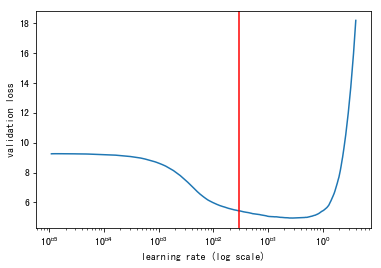

In [474]:
learner.sched.plot()
plt.axvline(x=3e-2, color="red");

先设置学习率微调embedding权重，一轮调最后一层包含词向量权重，训练出missing tokens更好的权重

In [555]:
lr=3e-2
# lr=1e-3
lrs = lr
learner.fit(lrs/2, 1, wds=wd, use_clr=(32,2), cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      4.876916   4.759636   0.1581    


[array([4.75964]), 0.15810018977639395]

In [556]:
learner.save('lm_last_ft')

In [557]:
learner.load('lm_last_ft')

In [558]:
learner.unfreeze()

In [559]:
learner.fit(lrs, 1, wds=wd, use_clr=(20,10), cycle_len=15)

epoch      trn_loss   val_loss   accuracy                     
    0      3.832584   3.737663   0.298853  
    1      4.17896    4.02803    0.284122                     
    2      4.162834   4.016865   0.292197                     
    3      4.171302   4.024511   0.2974                       
    4      4.174299   4.020073   0.300139                     
    5      4.152954   4.005552   0.302002                     
    6      4.139783   3.990187   0.303637                     
    7      4.133696   3.991889   0.305091                     
    8      4.125618   3.974964   0.306675                     
    9      4.112508   3.959693   0.309578                     
    10     4.085527   3.943077   0.311458                     
    11     4.057175   3.91849    0.314173                     
    12     4.046759   3.903127   0.316674                     
    13     4.002753   3.877731   0.319239                     
    14     3.987127   3.861441   0.3211                       


[array([3.86144]), 0.3211004115516247]

We save the trained model weights and separately save the encoder part of the LM model as well. This will serve as our backbone in the classification task model.

In [560]:
learner.save('lm1')

In [561]:
learner.save_encoder('lm1_enc')

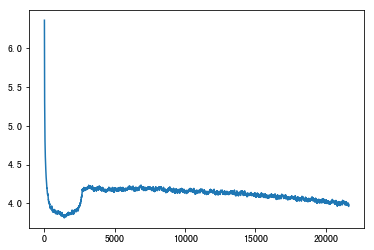

In [562]:
learner.sched.plot_loss()

## Classifier

In [563]:
trn_cla = np.array([[stoi[t] for t in e.split()] for e in train_B1_df['word']])

In [564]:
trn_label = train_B1_df['c_numerical'].values

In [565]:
from sklearn.model_selection import train_test_split 
trn_clas, val_clas, trn_labels, val_labels = train_test_split(trn_cla, trn_label, test_size=0.2, random_state=42)

In [566]:
bptt,em_sz,nh,nl = 70,300,1150,3
vs = len(itos)
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))
bs = 48

In [567]:
min_lbl = trn_labels.min()
trn_labels -= min_lbl
val_labels -= min_lbl
c=int(trn_labels.max())+1

In [568]:
trn_ds = TextDataset(trn_clas, trn_labels)
val_ds = TextDataset(val_clas, val_labels)
trn_samp = SortishSampler(trn_clas, key=lambda x: len(trn_clas[x]), bs=bs//2)
val_samp = SortSampler(val_clas, key=lambda x: len(val_clas[x]))
trn_dl = DataLoader(trn_ds, bs//2, transpose=True, num_workers=1, pad_idx=1, sampler=trn_samp)
val_dl = DataLoader(val_ds, bs, transpose=True, num_workers=1, pad_idx=1, sampler=val_samp)
md = ModelData(PATH, trn_dl, val_dl)

In [569]:
# part 1
dps = np.array([0.4, 0.5, 0.05, 0.3, 0.1])

In [494]:
dps = np.array([0.4,0.5,0.05,0.3,0.4])*0.5

In [570]:
m = get_rnn_classifier(bptt, 20*70, c, vs, emb_sz=em_sz, n_hid=nh, n_layers=nl, pad_token=1,
          layers=[em_sz*3, 50, c], drops=[dps[4], 0.1],
          dropouti=dps[0], wdrop=dps[1], dropoute=dps[2], dropouth=dps[3])

In [571]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))

In [572]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=.25
learn.metrics = [accuracy]

In [526]:
lr=3e-2
lrm = 2.6
lrs = np.array([lr/(lrm**4), lr/(lrm**3), lr/(lrm**2), lr/lrm, lr])

In [573]:
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])

In [574]:
wd = 1e-7
wd = 0
learner.load_encoder('lm1_enc')

In [575]:
learn.freeze_to(-1)

In [577]:
# learn.lr_find(lrs/1000)

In [578]:
# learn.sched.plot()
# plt.axvline(x=3e-2, color="red");

In [576]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr=(8,3))

epoch      trn_loss   val_loss   accuracy                   
    0      2.77859    2.75312    0.15875   


[array([2.75312]), 0.15875000009685755]

In [531]:
print(lrs)

[0.00066 0.00171 0.00444 0.01154 0.03   ]


In [579]:
learn.save('clas_0')

In [580]:
learn.load('clas_0')

In [581]:
learn.freeze_to(-2)

In [582]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr=(8,3))

epoch      trn_loss   val_loss   accuracy                   
    0      2.744222   2.738882   0.15875   


[array([2.73888]), 0.15875000009685755]

In [583]:
learn.save('clas_1')

In [584]:
learn.load('clas_1')

In [585]:
learn.unfreeze()

In [586]:
learn.fit(lrs, 1, wds=wd, cycle_len=14, use_clr=(32,10))

epoch      trn_loss   val_loss   accuracy                   
    0      2.558027   2.495492   0.23075   
    1      2.391883   2.469435   0.2465                     
    2      2.251277   2.736789   0.2985                     
    3      2.154949   4.104603   0.339                      
    4      2.084121   4.322234   0.35425                    
    5      2.00256    1.975354   0.373                      
    6      1.934767   2.390207   0.40875                    
    7      1.945743   2.734143   0.4125                     
    8      1.813279   3.075174   0.43725                    
    9      1.784126   3.330584   0.4565                     
    10     1.736501   1.763323   0.4655                     
    11     1.737804   2.636687   0.47025                    
    12     1.700827   5.038342   0.47225                    
    13     1.623694   5.834108   0.472                      


[array([5.83411]), 0.47199999922513963]

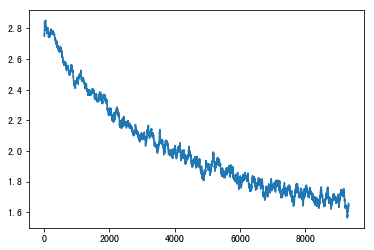

In [587]:
learn.sched.plot_loss()

In [588]:
learn.save('clas_2')

## Course4

In [532]:
em_sz = 200  # size of each embedding vector
nh = 500     # number of hidden activations per layer
nl = 3       # number of layers

In [533]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))

In [535]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)

md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

learner = md.get_model(opt_fn, em_sz, nh, nl,
               dropouti=0.05, dropout=0.05, wdrop=0.1, dropoute=0.02, dropouth=0.05)
learner.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learner.clip=0.3

In [536]:
learner.fit(3e-3, 4, wds=1e-6, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                
    0      3.963112   3.886686  
    1      3.642617   3.551546                                
    2      3.509402   3.470327                                
    3      3.538203   3.464301                                
    4      3.446512   3.397923                                
    5      3.356637   3.362462                                
    6      3.326469   3.351762                                
    7      3.459886   3.406591                                
    8      3.41302    3.384714                                
    9      3.375454   3.364341                                
    10     3.338818   3.345472                                
    11     3.297835   3.330314                                
    12     3.268265   3.31928                                 
    13     3.229251   3.314139                                
    14     3.214018   3.313166                                


[array([3.31317])]

In [537]:
learner.save_encoder('adam1_enc')

In [538]:
learner.load_encoder('adam1_enc')

In [539]:
learner.fit(3e-3, 1, wds=1e-6, cycle_len=10)

epoch      trn_loss   val_loss                                
    0      3.370867   3.437287  
    1      3.358299   3.38325                                 
    2      3.315635   3.35539                                 
    3      3.293123   3.344098                                
    4      3.27162    3.332447                                
    5      3.232894   3.32231                                 
    6      3.199915   3.313746                                
    7      3.169163   3.31064                                 
    8      3.14949    3.305823                                
    9      3.128014   3.308863                                


[array([3.30886])]

In [540]:
learner.save_encoder('adam3_10_enc')

In [541]:
learner.load_encoder('adam3_10_enc')

In [542]:
# 分类

In [543]:
# part 1
dps = np.array([0.4, 0.5, 0.05, 0.3, 0.1])

In [546]:
m = get_rnn_classifier(bptt, 20*70, c, vs, emb_sz=em_sz, n_hid=nh, n_layers=nl, pad_token=1,
          layers=[em_sz*3, 50, c], drops=[dps[4], 0.1],
          dropouti=dps[0], wdrop=dps[1], dropoute=dps[2], dropouth=dps[3])
m.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
# m.load_encoder(f'adam3_10_enc')

In [547]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=.25
learn.metrics = [accuracy]

In [ ]:
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])

In [ ]:
learn.freeze_to(-1)
learn.fit(lrs/2, 1, metrics=[accuracy])
learn.unfreeze()
learn.fit(lrs, 1, metrics=[accuracy], cycle_len=1)

In [ ]:
m3.fit(lrs, 7, metrics=[accuracy], cycle_len=2, cycle_save_name='call_reason2')

In [ ]:
m3.load_cycle('call_reason2', 4)

In [ ]:
accuracy_np(*m3.predict_with_targs())